In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import os
import seaborn as sns

In [200]:
from stt.data import Olist
from stt.order import Order
from stt.seller import Seller
seller = Seller().get_training_data()
order = Order().get_training_data()
data = Olist().get_data()

In [201]:
order

,order_id,wait_time,expected_wait_time,delay_vs_expected,order_status,order_delivered_customer_date,order_purchase_timestamp,dim_is_five_star,dim_is_one_star,review_score,number_of_products,number_of_sellers,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,8.436574,15.544063,0.0,delivered,2017-10-10 21:25:13,2017-10-02 10:56:33,0,0,4,1,1,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,13.782037,19.137766,0.0,delivered,2018-08-07 15:27:45,2018-07-24 20:41:37,0,0,4,1,1,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,9.394213,26.639711,0.0,delivered,2018-08-17 18:06:29,2018-08-08 08:38:49,1,0,5,1,1,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,13.208750,26.188819,0.0,delivered,2017-12-02 00:28:42,2017-11-18 19:28:06,1,0,5,1,1,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,2.873877,12.112049,0.0,delivered,2018-02-16 18:17:02,2018-02-13 21:18:39,1,0,5,1,1,19.90,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97010,9c5dedf39a927c1b2549525ed64a053c,8.218009,18.587442,0.0,delivered,2017-03-17 15:08:01,2017-03-09 09:54:05,1,0,5,1,1,72.00,13.08
97011,63943bddc261676b46f01ca7ac2f7bd8,22.193727,23.459051,0.0,delivered,2018-02-28 17:37:56,2018-02-06 12:58:58,0,0,4,1,1,174.90,20.10
97012,83c1379a015df1e13d02aae0204711ab,24.859421,30.384225,0.0,delivered,2017-09-21 11:24:17,2017-08-27 14:46:43,1,0,5,1,1,205.99,65.02
97013,11c177c8e97725db2631073c19f07b62,17.086424,37.105243,0.0,delivered,2018-01-25 23:32:54,2018-01-08 21:28:27,0,0,2,2,1,359.98,81.18


In [202]:
order

,order_id,wait_time,expected_wait_time,delay_vs_expected,order_status,order_delivered_customer_date,order_purchase_timestamp,dim_is_five_star,dim_is_one_star,review_score,number_of_products,number_of_sellers,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,8.436574,15.544063,0.0,delivered,2017-10-10 21:25:13,2017-10-02 10:56:33,0,0,4,1,1,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,13.782037,19.137766,0.0,delivered,2018-08-07 15:27:45,2018-07-24 20:41:37,0,0,4,1,1,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,9.394213,26.639711,0.0,delivered,2018-08-17 18:06:29,2018-08-08 08:38:49,1,0,5,1,1,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,13.208750,26.188819,0.0,delivered,2017-12-02 00:28:42,2017-11-18 19:28:06,1,0,5,1,1,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,2.873877,12.112049,0.0,delivered,2018-02-16 18:17:02,2018-02-13 21:18:39,1,0,5,1,1,19.90,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97010,9c5dedf39a927c1b2549525ed64a053c,8.218009,18.587442,0.0,delivered,2017-03-17 15:08:01,2017-03-09 09:54:05,1,0,5,1,1,72.00,13.08
97011,63943bddc261676b46f01ca7ac2f7bd8,22.193727,23.459051,0.0,delivered,2018-02-28 17:37:56,2018-02-06 12:58:58,0,0,4,1,1,174.90,20.10
97012,83c1379a015df1e13d02aae0204711ab,24.859421,30.384225,0.0,delivered,2017-09-21 11:24:17,2017-08-27 14:46:43,1,0,5,1,1,205.99,65.02
97013,11c177c8e97725db2631073c19f07b62,17.086424,37.105243,0.0,delivered,2018-01-25 23:32:54,2018-01-08 21:28:27,0,0,2,2,1,359.98,81.18


In [203]:
def review_cost(d):
    if d == 1:
        return 100
    if d == 2:
        return 50
    if d == 3:
        return 40
    return 0

def price_cut(d):
    return d*0.1

In [204]:
order['review_cost'] = order['review_score'].apply(review_cost)
order['price_cut'] = order['price'].apply(price_cut)

In [205]:
order_hist = order[order['order_status']=='delivered']
order_count = order.groupby(order_hist['order_delivered_customer_date'].dt.strftime("%y/%m")).agg({'order_id':'count','review_cost':'sum','price_cut':'sum'})

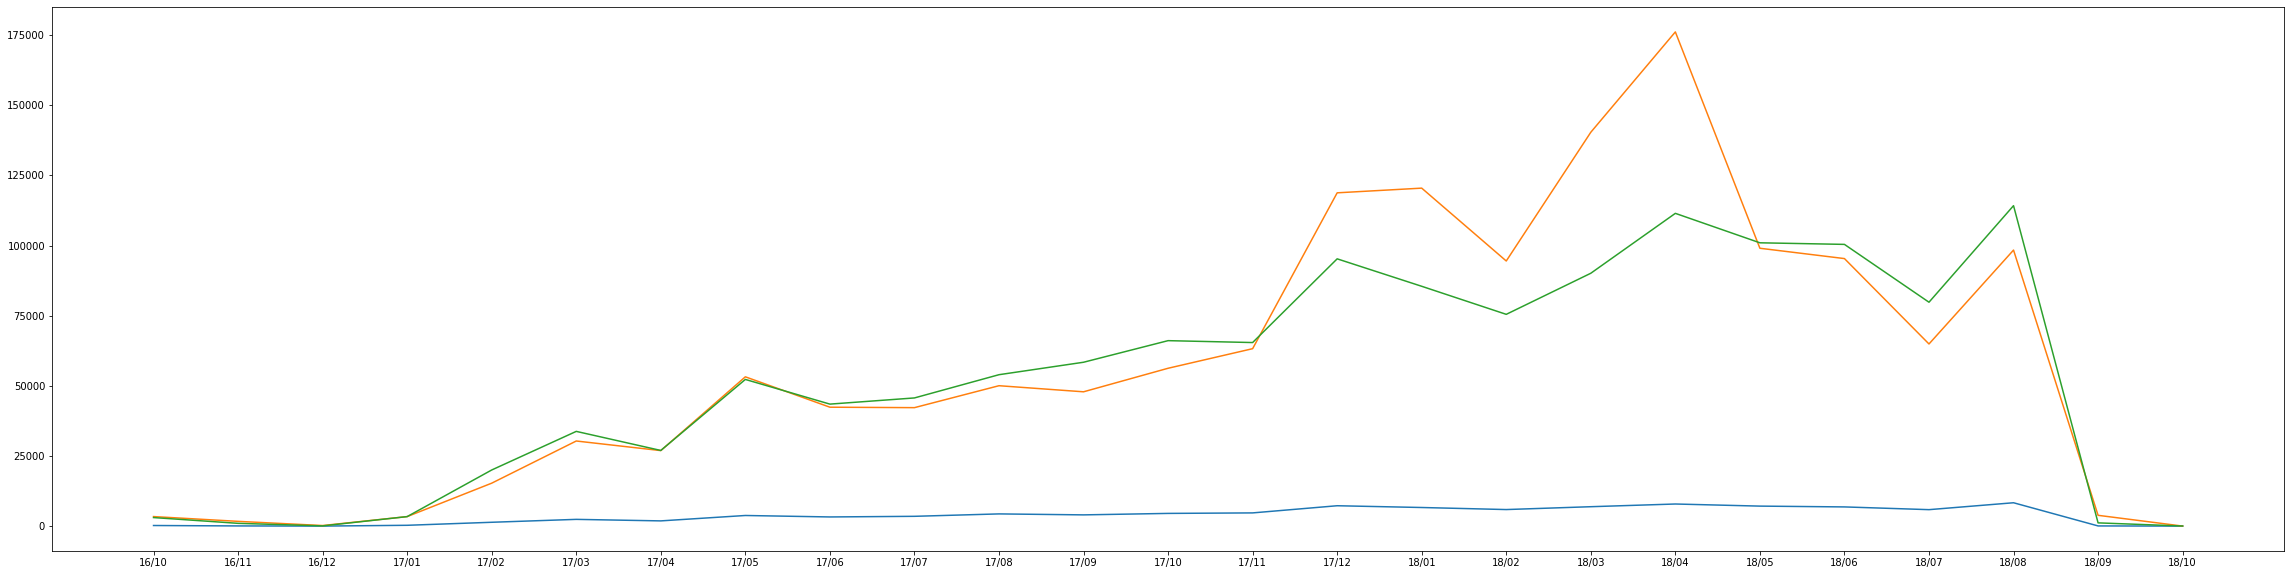

In [206]:
plt.figure(figsize=(40,10))
plt.plot(order_count)

In [207]:
order_count['order_id'].sum()

97007

In [215]:
order_id_seller_id = data['order_items'][['order_id','seller_id']]
monthly_seller = order.merge(order_id_seller_id, on='order_id')

In [216]:
monthly_seller = monthly_seller.groupby(order_hist['order_delivered_customer_date'].dt.strftime("%y/%m")).agg({'seller_id':'nunique'})

In [217]:
monthly = order_count.merge(monthly_seller, on='order_delivered_customer_date')
monthly['seller_id'] = monthly['seller_id']*80

In [211]:
monthly['cum_orders'] = monthly['order_id'].cumsum()

In [212]:
c = 500000/np.sqrt(monthly['cum_orders'].sum())
monthly['it_cost'] = round(c * np.sqrt(monthly["order_id"]),1)

In [218]:
monthly

,order_id,review_cost,price_cut,seller_id
order_delivered_customer_date,,,,
16/10,208,3390,3040.112,12800
16/11,58,1690,983.768,4240
16/12,4,200,75.886,320
17/01,285,3380,3381.592,16320
17/02,1361,15300,20000.292,48720
17/03,2397,30330,33760.200,66720
17/04,1855,26910,26962.304,58160
17/05,3780,53210,52276.938,84000
17/06,3259,42380,43480.695,81600


In [240]:
monthly2 = monthly.copy()
monthly2 = monthly2.sort_values('order_delivered_customer_date')
monthly2['cum_orders'] = monthly2['order_id'].cumsum()
monthly2['cum_rev'] = (monthly2['seller_id'] + monthly2['price_cut']).cumsum()
c = 500000/np.sqrt(monthly2['order_id'].sum())
monthly2['it_cost'] = round(c * np.sqrt(monthly2['order_id']),1)
monthly2['cum_it_cost'] = round(c * np.sqrt(monthly2["cum_orders"]),1)
monthly2['cum_review_cost'] = monthly2['review_cost'].cumsum()
monthly2['total_cost'] = monthly2['cum_review_cost'] + monthly2['cum_it_cost']
monthly2['profit'] = monthly2['cum_rev'] - monthly2['total_cost']
monthly2['month'] = monthly2['price_cut'] + monthly2['seller_id'] - monthly2['it_cost'] - monthly2['review_cost']
monthly2


#sorted_profit['cum_profit'] = round(sorted_profit['cum_rev'] - sorted_profit['cum_it_cost'],1)

,order_id,review_cost,price_cut,seller_id,cum_orders,cum_rev,it_cost,cum_it_cost,cum_review_cost,total_cost,profit,month
order_delivered_customer_date,,,,,,,,,,,,
16/10,208,3390,3040.112,12800,208,15840.112,23152.6,23152.6,3390,26542.6,-10702.488,-10702.488
16/11,58,1690,983.768,4240,266,21063.880,12225.9,26182.4,5080,31262.4,-10198.520,-8692.132
16/12,4,200,75.886,320,270,21459.766,3210.7,26378.5,5280,31658.5,-10198.734,-3014.814
17/01,285,3380,3381.592,16320,555,41161.358,27101.3,37819.4,8660,46479.4,-5318.042,-10779.708
17/02,1361,15300,20000.292,48720,1916,109881.650,59224.0,70269.4,23960,94229.4,15652.250,-5803.708
17/03,2397,30330,33760.200,66720,4313,210361.850,78596.4,105428.5,54290,159718.5,50643.350,-8446.200
17/04,1855,26910,26962.304,58160,6168,295484.154,69141.8,126078.4,81200,207278.4,88205.754,-10929.496
17/05,3780,53210,52276.938,84000,9948,431761.092,98699.4,160116.6,134410,294526.6,137234.492,-15632.462
17/06,3259,42380,43480.695,81600,13207,556841.787,91645.4,184489.0,176790,361279.0,195562.787,-8944.705


In [237]:
monthly2['month']

order_delivered_customer_date
16/10   -10702.488
16/11    -8692.132
16/12    -3014.814
17/01   -10779.708
17/02    -5803.708
17/03    -8446.200
17/04   -10929.496
17/05   -15632.462
17/06    -8944.705
17/07    -8253.703
17/08   -11320.175
17/09    -3851.276
17/10    -4910.859
17/11   -13721.251
17/12   -46991.690
18/01   -56464.392
18/02   -40582.815
18/03   -71787.800
18/04   -88870.409
18/05   -18575.142
18/06   -16621.413
18/07    -3197.261
18/08   -11231.446
18/09   -10786.396
18/10    -2512.960
Name: month, dtype: float64

In [154]:
data = Olist().get_data()
order_id_seller_id = data['order_items'][['order_id','seller_id']]

In [155]:
Olist().get_data()['order_items'][['order_id','seller_id']]

,order_id,seller_id
0,00010242fe8c5a6d1ba2dd792cb16214,48436dade18ac8b2bce089ec2a041202
1,00018f77f2f0320c557190d7a144bdd3,dd7ddc04e1b6c2c614352b383efe2d36
2,000229ec398224ef6ca0657da4fc703e,5b51032eddd242adc84c38acab88f23d
3,00024acbcdf0a6daa1e931b038114c75,9d7a1d34a5052409006425275ba1c2b4
4,00042b26cf59d7ce69dfabb4e55b4fd9,df560393f3a51e74553ab94004ba5c87
...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,b8bc237ba3788b23da09c0f1f3a3288c
112646,fffcd46ef2263f404302a634eb57f7eb,f3c38ab652836d21de61fb8314b69182
112647,fffce4705a9662cd70adb13d4a31832d,c3cfdc648177fdbbbb35635a37472c53
112648,fffe18544ffabc95dfada21779c9644f,2b3e4a2a3ea8e01938cabda2a3e5cc79


In [156]:
order

,order_id,wait_time,expected_wait_time,delay_vs_expected,order_status,order_delivered_customer_date,order_purchase_timestamp,dim_is_five_star,dim_is_one_star,review_score,number_of_products,number_of_sellers,price,freight_value,review_cost,price_cut
0,e481f51cbdc54678b7cc49136f2d6af7,8.436574,15.544063,0.0,delivered,2017-10-10 21:25:13,2017-10-02 10:56:33,0,0,4,1,1,29.99,8.72,0,2.999
1,53cdb2fc8bc7dce0b6741e2150273451,13.782037,19.137766,0.0,delivered,2018-08-07 15:27:45,2018-07-24 20:41:37,0,0,4,1,1,118.70,22.76,0,11.870
2,47770eb9100c2d0c44946d9cf07ec65d,9.394213,26.639711,0.0,delivered,2018-08-17 18:06:29,2018-08-08 08:38:49,1,0,5,1,1,159.90,19.22,0,15.990
3,949d5b44dbf5de918fe9c16f97b45f8a,13.208750,26.188819,0.0,delivered,2017-12-02 00:28:42,2017-11-18 19:28:06,1,0,5,1,1,45.00,27.20,0,4.500
4,ad21c59c0840e6cb83a9ceb5573f8159,2.873877,12.112049,0.0,delivered,2018-02-16 18:17:02,2018-02-13 21:18:39,1,0,5,1,1,19.90,8.72,0,1.990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97010,9c5dedf39a927c1b2549525ed64a053c,8.218009,18.587442,0.0,delivered,2017-03-17 15:08:01,2017-03-09 09:54:05,1,0,5,1,1,72.00,13.08,0,7.200
97011,63943bddc261676b46f01ca7ac2f7bd8,22.193727,23.459051,0.0,delivered,2018-02-28 17:37:56,2018-02-06 12:58:58,0,0,4,1,1,174.90,20.10,0,17.490
97012,83c1379a015df1e13d02aae0204711ab,24.859421,30.384225,0.0,delivered,2017-09-21 11:24:17,2017-08-27 14:46:43,1,0,5,1,1,205.99,65.02,0,20.599
97013,11c177c8e97725db2631073c19f07b62,17.086424,37.105243,0.0,delivered,2018-01-25 23:32:54,2018-01-08 21:28:27,0,0,2,2,1,359.98,81.18,50,35.998


In [157]:
#reconfigure seller
seller['date_first_sale'] = pd.to_datetime(seller['date_first_sale'].map(lambda x: x.strftime("%Y-%m-%d")))
seller['date_last_sale'] = pd.to_datetime(seller['date_last_sale'])
seller['date_last_sale']=seller['date_last_sale'].map(lambda x: x.strftime("%Y-%m-%d"))
seller['date_last_sale'] = pd.to_datetime(seller['date_last_sale'])
seller['active_months'] = round((seller['date_last_sale']-seller['date_first_sale'])/datetime.timedelta(days=1)/30,0)

In [158]:
#add monthly fee if only # day active
seller['active_months'] = seller['active_months'].apply(lambda x: 1 if x == 0 else x)
# 80 BRL per month per seller
seller['rev_seller_monthly'] = seller['active_months']*80
# 10% of sales
seller['rev_orders_monthly'] = seller['sales']*0.1

In [160]:
# Merge orders with sellers
order_sel = order.merge(order_id_seller_id, on='order_id')

In [161]:
order_sel

,order_id,wait_time,expected_wait_time,delay_vs_expected,order_status,order_delivered_customer_date,order_purchase_timestamp,dim_is_five_star,dim_is_one_star,review_score,number_of_products,number_of_sellers,price,freight_value,review_cost,price_cut,seller_id
0,e481f51cbdc54678b7cc49136f2d6af7,8.436574,15.544063,0.0,delivered,2017-10-10 21:25:13,2017-10-02 10:56:33,0,0,4,1,1,29.99,8.72,0,2.999,3504c0cb71d7fa48d967e0e4c94d59d9
1,53cdb2fc8bc7dce0b6741e2150273451,13.782037,19.137766,0.0,delivered,2018-08-07 15:27:45,2018-07-24 20:41:37,0,0,4,1,1,118.70,22.76,0,11.870,289cdb325fb7e7f891c38608bf9e0962
2,47770eb9100c2d0c44946d9cf07ec65d,9.394213,26.639711,0.0,delivered,2018-08-17 18:06:29,2018-08-08 08:38:49,1,0,5,1,1,159.90,19.22,0,15.990,4869f7a5dfa277a7dca6462dcf3b52b2
3,949d5b44dbf5de918fe9c16f97b45f8a,13.208750,26.188819,0.0,delivered,2017-12-02 00:28:42,2017-11-18 19:28:06,1,0,5,1,1,45.00,27.20,0,4.500,66922902710d126a0e7d26b0e3805106
4,ad21c59c0840e6cb83a9ceb5573f8159,2.873877,12.112049,0.0,delivered,2018-02-16 18:17:02,2018-02-13 21:18:39,1,0,5,1,1,19.90,8.72,0,1.990,2c9e548be18521d1c43cde1c582c6de8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110835,63943bddc261676b46f01ca7ac2f7bd8,22.193727,23.459051,0.0,delivered,2018-02-28 17:37:56,2018-02-06 12:58:58,0,0,4,1,1,174.90,20.10,0,17.490,1f9ab4708f3056ede07124aad39a2554
110836,83c1379a015df1e13d02aae0204711ab,24.859421,30.384225,0.0,delivered,2017-09-21 11:24:17,2017-08-27 14:46:43,1,0,5,1,1,205.99,65.02,0,20.599,d50d79cb34e38265a8649c383dcffd48
110837,11c177c8e97725db2631073c19f07b62,17.086424,37.105243,0.0,delivered,2018-01-25 23:32:54,2018-01-08 21:28:27,0,0,2,2,1,359.98,81.18,50,35.998,a1043bafd471dff536d0c462352beb48
110838,11c177c8e97725db2631073c19f07b62,17.086424,37.105243,0.0,delivered,2018-01-25 23:32:54,2018-01-08 21:28:27,0,0,2,2,1,359.98,81.18,50,35.998,a1043bafd471dff536d0c462352beb48


In [162]:
#Define two/three star functions and applying
def dim_two_star(d):
            if d == 2:
                return 1
            else:
                return 0
            
def dim_three_star(d):
            if d == 3:
                return 1
            else:
                return 0

order_sel['dim_is_two_star'] = order_sel['review_score'].apply(dim_two_star)
order_sel['dim_is_three_star'] = order_sel['review_score'].apply(dim_three_star)

In [173]:
#Summing binary columns, aggregating and getting reduced dataset
seller_id_star = order_sel.groupby('seller_id').agg('sum')
seller_small = seller_id_star[['dim_is_one_star','dim_is_two_star','dim_is_three_star']]
seller_small

,dim_is_one_star,dim_is_two_star,dim_is_three_star
seller_id,,,
0015a82c2db000af6aaaf3ae2ecb0532,1,0,0
001cca7ae9ae17fb1caed9dfb1094831,31,11,21
002100f778ceb8431b7a1020ff7ab48f,6,1,9
003554e2dce176b5555353e4f3555ac8,0,0,0
004c9cd9d87a3c30c522c48c4fc07416,15,10,20
...,...,...,...
ffc470761de7d0232558ba5e786e57b7,2,0,5
ffdd9f82b9a447f6f8d4b91554cc7dd3,1,2,1
ffeee66ac5d5a62fe688b9d26f83f534,2,0,0


In [174]:
order_sel.groupby('seller_id').agg('sum')[['dim_is_one_star','dim_is_two_star','dim_is_three_star']]

,dim_is_one_star,dim_is_two_star,dim_is_three_star
seller_id,,,
0015a82c2db000af6aaaf3ae2ecb0532,1,0,0
001cca7ae9ae17fb1caed9dfb1094831,31,11,21
002100f778ceb8431b7a1020ff7ab48f,6,1,9
003554e2dce176b5555353e4f3555ac8,0,0,0
004c9cd9d87a3c30c522c48c4fc07416,15,10,20
...,...,...,...
ffc470761de7d0232558ba5e786e57b7,2,0,5
ffdd9f82b9a447f6f8d4b91554cc7dd3,1,2,1
ffeee66ac5d5a62fe688b9d26f83f534,2,0,0


In [175]:
# Calculating full review cost
seller_small['dim_is_one_star'] = seller_small['dim_is_one_star']*100
seller_small['dim_is_two_star'] = seller_small['dim_is_two_star']*50
seller_small['dim_is_three_star'] = seller_small['dim_is_three_star']*40
seller_small['sum'] = seller_small.sum(axis=1)
seller_cost = seller_small[['sum']].rename(columns={'sum':'cost_reviews'})
#seller_cost = seller_cost.rename(columns={'sum':'cost_reviews'})

/Users/admin/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/admin/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/admin/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is 

In [176]:
seller_cost

,cost_reviews
seller_id,
0015a82c2db000af6aaaf3ae2ecb0532,100
001cca7ae9ae17fb1caed9dfb1094831,4490
002100f778ceb8431b7a1020ff7ab48f,1010
003554e2dce176b5555353e4f3555ac8,0
004c9cd9d87a3c30c522c48c4fc07416,2800
...,...
ffc470761de7d0232558ba5e786e57b7,400
ffdd9f82b9a447f6f8d4b91554cc7dd3,240
ffeee66ac5d5a62fe688b9d26f83f534,200


In [177]:
# Merge
seller_table = seller[['seller_id','rev_seller_monthly','rev_orders_monthly','active_months','wait_time','delay_to_carrier','review_score','n_orders']]
seller_rc = seller_table.merge(seller_cost, on = 'seller_id')

In [178]:
# Revenue, cost, profit per seller_id
seller_rc['total_rev'] = seller_rc['rev_seller_monthly']+seller_rc['rev_orders_monthly']
seller_rc['profit'] = seller_rc['total_rev'] - seller_rc['cost_reviews']
seller_rc = seller_rc.round(2)
seller_rc = seller_rc.rename(columns={'rev_seller_monthly':'rev_seller','rev_orders_monthly' : 'rev_orders', 'cost reviews':'cost_reviews'})
seller_rc['profitable'] = seller_rc['profit'].apply(lambda x: 0 if x < 0 else 1)
seller_rc.head()

,seller_id,rev_seller,rev_orders,active_months,wait_time,delay_to_carrier,review_score,n_orders,cost_reviews,total_rev,profit,profitable
0,3442f8959a84dea7ee197c632cb2df15,320.0,21.87,4.0,13.02,0.00,3.00,3,140,341.87,201.87,1
1,d1b65fc7debc3361ea86b5f14c68d2e2,1120.0,1170.31,14.0,9.07,0.00,4.55,40,140,2290.31,2150.31,1
2,ce3ad9de960102d0677a81f5d0bb7b2d,80.0,15.80,1.0,4.04,0.00,5.00,1,0,95.80,95.80,1
3,c0f3eea2e14555b6faeea3dd58c1b1c3,80.0,8.00,1.0,5.67,0.00,5.00,1,0,88.00,88.00,1
4,51a04a8a6bdcb23deccc82b0b80742cf,80.0,16.80,1.0,35.31,3.35,1.00,1,100,96.80,-3.20,0


In [193]:
sorted_profit['n_orders'].sum()

99844

In [180]:
seller_it = seller_rc[['seller_id','profit','n_orders']]
# Sort cumulative
sorted_profit = seller_it.sort_values('profit').reset_index()
sorted_profit['cum_orders'] = sorted_profit['n_orders'].cumsum()
sorted_profit['cum_rev'] = round(sorted_profit['profit'].cumsum(),1)
c = 500000/np.sqrt(sorted_profit['n_orders'].sum())
sorted_profit['it_cost'] = round(c * np.sqrt(sorted_profit["n_orders"]),1)
sorted_profit['cum_it_cost'] = round(c * np.sqrt(sorted_profit["cum_orders"]),1)
sorted_profit['cum_profit'] = round(sorted_profit['cum_rev'] - sorted_profit['cum_it_cost'],1)

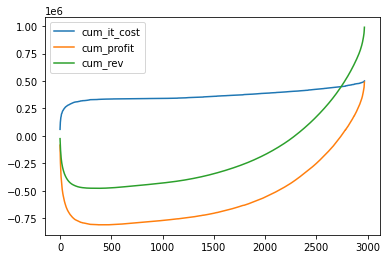

In [181]:
###Plot cumulative costs and revenues
it_prof = sorted_profit[['cum_it_cost','cum_profit','cum_rev']]
plt.plot(it_prof)
plt.legend(['cum_it_cost','cum_profit','cum_rev'])

In [182]:
# Optimalisation loop
optim_profit = sorted_profit.copy()
ls = []
i = 0
while i < len(sorted_profit):
    # get necessary results in new list
    ls.append([optim_profit['seller_id'].iloc[0],optim_profit['cum_profit'].iloc[-1]])
    # drop top row
    optim_profit = optim_profit.drop(optim_profit.index[0])
    i += 1
    # recalculate DF
    optim_profit['cum_orders'] = optim_profit['n_orders'].cumsum()
    optim_profit['cum_rev'] = round(optim_profit['profit'].cumsum(),1)
    optim_profit['it_cost'] = round(c * np.sqrt(optim_profit["n_orders"]),1)
    c = 500000/np.sqrt(optim_profit['n_orders'].sum())
    optim_profit['cum_it_cost'] = round(c * np.sqrt(optim_profit["cum_orders"]),1)
    optim_profit['prof/it'] = optim_profit['profit']/optim_profit['it_cost']
    optim_profit['cum_profit'] = round(optim_profit['cum_rev'] - optim_profit['cum_it_cost'],1)

/Users/admin/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app


In [183]:
# New DF for optimal
optim = pd.DataFrame(ls).rename(columns={0:'seller_id',1:'profit'})
optim.reset_index(inplace=True)
optim.rename(columns={'index':'companies to cut'},inplace=True)

In [184]:
# Cut-off value & optimal profit
optim[optim['profit']==optim['profit'].max()]

,companies to cut,seller_id,profit
374,374,4e2627090e6e5b9fabba883a37897683,967349.1
375,375,1588ac4010787100dddef64568f0ae35,967349.1
376,376,19484c79cef6c062cb177aa4ef2fcc3c,967349.1


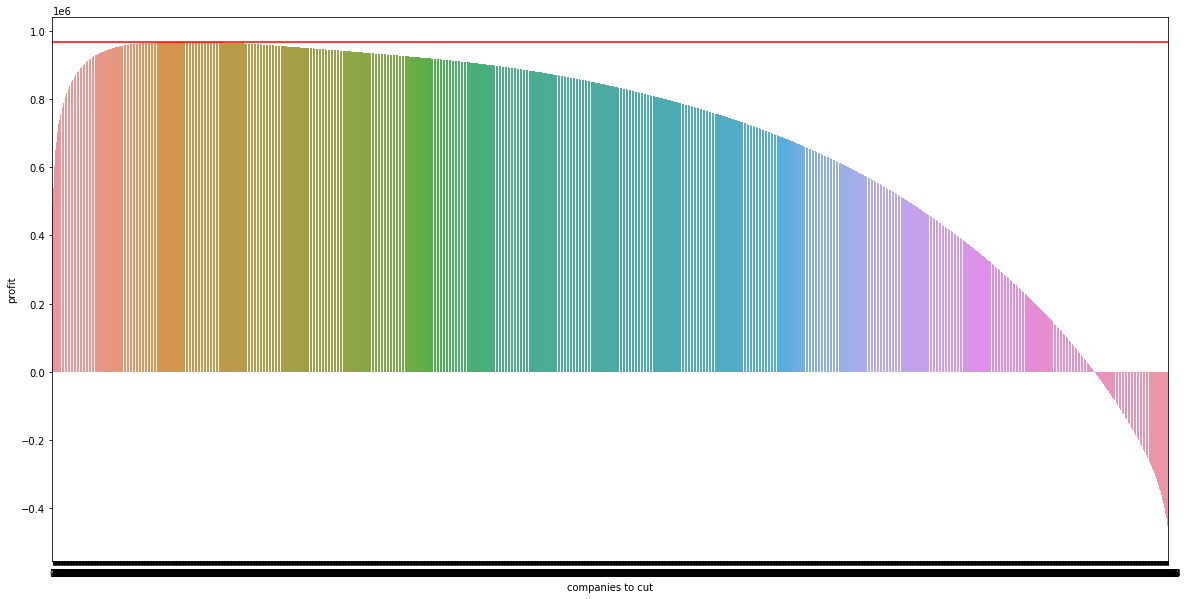

In [185]:
# graphical representation
plt.figure(figsize=(20,10))
sns.barplot(y='profit',x='companies to cut',data=optim)
plt.axhline(y=optim['profit'].max(), color='r', linestyle='-')

In [186]:
to_cut = pd.DataFrame(optim[optim.index < 374]['seller_id'])
to_cut['cut'] = "cut"

In [187]:
sorted_profit_cut = sorted_profit.merge(to_cut, on = 'seller_id', how = 'left')

In [188]:
# new df
new_df = sorted_profit[sorted_profit_cut['cut'] != 'cut']

In [189]:
new_df

,index,seller_id,profit,n_orders,cum_orders,cum_rev,it_cost,cum_it_cost,cum_profit
374,2954,4e2627090e6e5b9fabba883a37897683,-0.05,2,44147,-477813.6,2237.8,332475.5,-810289.1
375,2709,1588ac4010787100dddef64568f0ae35,-0.00,3,44150,-477813.6,2740.8,332486.8,-810300.4
376,1167,19484c79cef6c062cb177aa4ef2fcc3c,0.19,1,44151,-477813.4,1582.4,332490.5,-810303.9
377,1844,01fd077212124329bac32490e8ef80d9,0.80,31,44182,-477812.6,8810.3,332607.2,-810419.8
378,1487,f593898ec748b7a8cb81fc04edafd98a,1.30,20,44202,-477811.3,7076.6,332682.5,-810493.8
...,...,...,...,...,...,...,...,...,...
2965,2153,edb1ef5e36e0c8cd84eb3c9b003e486d,7338.46,166,98044,933409.4,20387.5,495472.5,437936.9
2966,2833,46dc3b2cc0980fb8ec44634e21d2718e,7571.12,521,98565,940980.6,36118.3,496787.2,444193.4
2967,534,fa1c13f2614d7b5c4749cbc52fecda94,14804.20,585,99150,955784.8,38272.5,498259.3,457525.5
2968,67,7e93a43ef30c4f03f38b393420bc753a,15963.19,336,99486,971747.9,29005.4,499102.8,472645.1


In [190]:
new_df = new_df.sort_values('profit').reset_index()
new_df['cum_orders'] = new_df['n_orders'].cumsum()
new_df['cum_rev'] = round(new_df['profit'].cumsum(),1)
c = 500000/np.sqrt(new_df['n_orders'].sum())
new_df['it_cost'] = round(c * np.sqrt(new_df["n_orders"]),1)
new_df['cum_it_cost'] = round(c * np.sqrt(new_df["cum_orders"]),1)
new_df['cum_profit'] = round(new_df['cum_rev'] - new_df['cumul_it_cost'],1)
del new_df['index']

KeyError: 'cumul_it_cost'

In [ ]:
it_prof_new = new_df[['cum_it_cost','cum_profit','cum_rev']]
plt.plot(it_prof_new)
plt.legend(['cum_it_cost','cum_profit','cum_rev'])